<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_6_simulacao_espectros_de_cascateamentos_calcula_CV_e_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as mt
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel function
import matplotlib.pyplot as plt
from google.colab import files
import csv

# Parâmetros dos moduladores
Vpi_pm1  = 3
Vpi_mz1  = 4 #2.4


ts5 = 2*mt.sqrt(5)  # 4.47213

#---------------------------Driving voltage ------------------------------------
#----------PM --------- Potências de entrada em dBm nas portas dos moduladores
Ppm1  = 16.75;  ang1pm = 0;  Upm1   =  0;     Tpm1  =  (pi*Upm1/Vpi_pm1);    Apm1  = (pi/Vpi_pm1)*10**(Ppm1/20)/ts5
# Ppm1  = 15.75;  pm plano
V1pm  =  10**(Ppm1/20)/(2*np.sqrt(5));

# --------- MZM ---------------------------No condition
#Pmz1a = 33;  ang1a  = 0;  Umz1a  =  0;   Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5
#Pmz1b = 32;  ang1b  = 0;  Umz1b  =  0;     Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = (pi/Vpi_mz1)*10**(Pmz1b/20)/ts5;
# ------------------------------------MZM flat condition
Pmz1a    = 30.48;  V1a  =  10**(Pmz1a/20)/(2*np.sqrt(5));  ang1a  = 0;  Umz1a  = Vpi_mz1/2 ;    Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5 # Umz1a  = Vpi_mz1/2
Nao_used = 10;     V1b  =  V1a + Vpi_mz1/2;                ang1b  = 0;  Umz1b  =  0;            Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = Amz1a + pi/2;



#if P_cw is inside the MZ vector, this will multiply the number of times there are MZs, so P_cw
P_cw    = 1# 3.55
num_mzm = 3
P_cw    = 1 #P_cw**(1/3)

# ==============================================================================
Th1a = 0
Th1b = pi/2

'''
#---------------------------- VALORES DE TENSÕES ------------------
Apm1 = 1.9   #.9   # 1.9 valor experimento
Amz1a = 9.78   #9.78 valor
Amz1b = 11.35   #11.35 valor
'''
Apm1   =  1.9
Amz1a  = 12
Amz1b  = 12


#----------------------------TESTING VALUES------------------------------------
up_n  =  45   # number of generated SLs for PM
up_m  =  55   # number of generated SLs for MZ
up_i  =  71   # number of generated SLs for IM

noise = 10**-7; noise_dBm = 10*log10(noise)

#===============================================================================

#--------------------------- Preenchimento do vector PM
top_n = int((up_n-1)/2)
ind_n = range(-top_n,top_n+1)

Vector_pm = []
for n in ind_n:
  J_n_Apm = besselj(n,Apm1)
  Vector_pm.append(J_n_Apm)

#---------------------------- Preenchimento do vector MZ
top_m = int((up_m-1)/2)
ind_m = range(-top_m,top_m+1)

Vector_mz = []
for m in ind_m:
  J_m_Amz1a = besselj(m,Amz1a)
  J_m_Amz1b = besselj(m,Amz1b)
  temp = P_cw*0.5*J_m_Amz1a*exp(j*(m*ang1a + Th1a)) + P_cw*0.5*J_m_Amz1b*exp(j*(m*ang1b + Th1b))
  Vector_mz.append(temp)

#---------------------------- Preenchimento do vector MZ2
top_m = int((up_m-1)/2)
ind_m2 = range(-top_m,top_m+1)

'''
Vector_mz2 = []
for m in ind_m2:
  J_m_Amz2a = besselj(m,Amz2a)
  J_m_Amz2b = besselj(m,Amz2b)
  temp = P_cw*0.5*J_m_Amz2a*exp(j*(m*ang1a + Th1a)) + P_cw*0.5*J_m_Amz2b*exp(j*(m*ang1b + Th1b))
  Vector_mz2.append(temp)
'''

# MZM transfer function :
# https://webdemo.inue.uni-stuttgart.de/webdemos/02_lectures/uebertragungstechnik_2/mach_zehnder_modulator/index.php?id=1
#-------------------------------------------------------------------------------
# Função principal que faz o produto cruzado de 2 campos eletricos, usando como
# dados de entrada os tamanhos dos vectores e vectores de campos eletricos
# que estão interagindo

def crossprod_efield(up_1, Vector_1, up_2, Vector_2):
 up_vre = up_1 + up_2 - 1    # limite do vetor resultante
 #ax_crossprod_vector = []   # dominio do vetor resultante
 #top_k = int((up_vre-1)/2)
 #ax_crossprod_vector = range(-top_k,top_k+1)
 Matrix_cross_efield = np.zeros((up_1, up_vre), dtype=complex) # Tamanho da matrix
 t = 0
 k = 0
 # -------------------- begin for
 for j in range(up_1):
  temp1 = Vector_1[j]
  for i in range(up_2):
    temp2 = Vector_2[i]
    temp3 = temp1*temp2
    k     = i + t
    Matrix_cross_efield[j][k] = temp3
 #print('\n')
  t = j+1
 # -------------------- end for
 #Vector_EFre  Electric Field Resultant
 Vector_EFre= np.sum(Matrix_cross_efield, axis=0) #soma das colunas de campos E
 temp2 = [abs(kt) for kt in Vector_EFre]
 #print(Vector_EFre)
 Vector_Ire = np.square(temp2)  # Intensity_resultant
 #Vector_Ire = np.square(abs(Vector_EFre))  # Intensity_resultant # it doesn't work

 return up_vre, Matrix_cross_efield, Vector_EFre, Vector_Ire

#--------------------------end crossprod_efield
#------------------------------------------------------------------------------

def add_noise(up_vec, Vector_Iout_all, noise):
 ax_vector_comb  = []   # dominio do vetor resultante
 top_k = int((up_vec-1)/2)
 ax_vector_comb = range(-top_k,top_k+1)
 Comb_plot     = []    # vector usado para considerar o ruido
 Comb_plot_dBm = []    # vector usado para considerar o ruido en dBm
 for k1 in range(up_vec):
    temp  = Vector_Iout_all[k1]
    if temp < noise:
      Comb_plot.append(0)
      Comb_plot_dBm.append(10*log10(noise))
    else:
      Comb_plot.append(Vector_Iout_all[k1])
      Comb_plot_dBm.append(10*log10(temp))
 return ax_vector_comb,Comb_plot,Comb_plot_dBm

#------------function calculate Intensity and add noise----------------
#  Usa um vetor de campo elétrico e calcula E.^2 e adiciona ruido
def find_Iout_add_noise(up_vec, Vector_efield_all, noise):
 temp2 = [abs(k2) for k2 in Vector_efield_all]
 Vector_Iout_all = np.square(temp2)
 ax_vector_comb  = []   # dominio do vetor resultante
 top_k = int((up_vec-1)/2)
 ax_vector_comb = range(-top_k,top_k+1)
 Comb_plot     = []    # vector usado para considerar o ruido
 Comb_plot_dBm = []    # vector usado para considerar o ruido en dBm
 for k1 in range(up_vec):
    temp  = Vector_Iout_all[k1]
    if temp < noise:
      Comb_plot.append(0)
      Comb_plot_dBm.append(10*log10(noise))
    else:
      Comb_plot.append(Vector_Iout_all[k1])
      Comb_plot_dBm.append(10*log10(temp))

 return ax_vector_comb,Comb_plot,Comb_plot_dBm

# -------------------------------------------------------------------------
# Esta função Reduz o tamanho do vector Comb (que já tem ruido) para um valor
# desejado, neste caso não importa se o vector está em mW ou dBm
# up_vec = tamanho atual, vec_comb = vector_actual, up_new = tamanho requerido

def reduct_vector(up_act, vec_comb, up_new):
 # up_act = tamanho atual do vector vec_comb
 a = int((up_act-up_new)/2)
 b = int(a + up_new)
 c = int((up_new-1)/2)
 ax_rang = range(-c,c+1)
 ax_new_list = list(ax_rang)
 new_vcomb = []
 for k in range(a,b):
  new_vcomb.append(vec_comb[k])

 return ax_new_list, new_vcomb
#--------------------------------------end function
# SAÍDA: lista novo dominio do comb , comb com dominio maior
#----------------------------------------------------------------------------
# Esta função aumenta o  o tamanho do vector Comb (que já tem ruido) para um
# valor desejado  unid = 1 -> em mW  ou otro em dBm, noise = usado no sistema

def increase_vector(up_act, vec_comb, up_new, unid, noise):
 # (ax_new, new_vcomb) = increase_vector(up_act, vec_comb, up_new, unid, noise)
 rg = int((up_new - 1)/2)
 a1 = int((up_new - up_act)/2)
 a2 = int(a1 + up_act)
 ax_rang = range(-rg, rg + 1)
 ax_new = list(ax_rang)
 new_vcomb = []
 t1 = 0
 for k in range(up_new):
  if k < a1  or k > a2-1:
    if unid == 1:
     new_vcomb.append(0)
    else:
     new_vcomb.append(10*math.log10(noise))
  else:
   new_vcomb.append(vec_comb[t1])
   t1 = t1 + 1
 return ax_new, new_vcomb
# SAÍDA: lista novo dominio do comb , comb com dominio maior
# ---------------------------------------------------------------------
#----------------- FUNCAO PARA PLOTAR SLs --------------------------
def ploting_sl(axrange, comb, comb_dBm, sistem):
 fig, axes = plt.subplots(1, 2, figsize=(16, 4.5), tight_layout=True)
 plt.rcParams['font.size'] = '14'
 axes[0].stem(axrange,comb,
              use_line_collection = True, linefmt='blue', markerfmt='bo')
 axes[0].set_title('Intensidade de saída normalizada do'+ sistem, pad=15)
 axes[0].set_xlabel("$m$")
 axes[0].set_ylabel("$I_{PM}/I_{IN}$")
 axes[0].grid(True,which="both", linestyle='--')


 axes[1].stem(axrange,comb_dBm,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='blue', markerfmt='bo')
 axes[1].set_title('Intensidade de saída normalizada do'+sistem+'em dB', pad=15)
 axes[1].set_xlabel("$m$")
 axes[1].set_ylabel("$10 log_{10}(I_{PM}/I_{IN})$ (dB)")
 axes[1].grid(True,which="both", linestyle='--')

 #axes[1].tick_params(axis='x', labelsize=14)

 '''
 axes[0].set_xlim(-29.5, 29.5)
 axes[0].set_ylim(-0.0005, 0.04)
 #axes[0].set_yticks(range(0 , 0.005, 0.04))


 #axes[1].set_xlim(-29.5, 29.5)
 axes[1].set_yticks(range(-80, 0, 10))

 axes[1].set_ylim(-82, 0)
 axes[1].set_xlim(-27.5, 27.5)
 axes[1].set_yticks(range(-80, 0, 10))
 '''


def analise_SD_AV(vec_SL, eN):
  up_x = len(vec_SL)  #up_m  Tamanho do Vetor gerado por MSL
  #print(vec_SL)
  print('Tamanho do vector de saida do EOM :', up_x)
  #Quantidade de SLs avaliadas
  print('eNc =', eN)
  ia = int((up_x - eN-2)/2+1)
  ib = int((up_x + eN-2)/2+1)

  #print('Faixa entre inicio e final ia=',ia, 'ib=',ib)
  # Encontramos o vetor central a ser avaliado
  v_analyze = []
  for k in range(ia,ib):
    v_analyze.append(vec_SL[k])

  #print('Fator de variação SLs avaliadas   --:', np.std(v_analyze)/np.mean(v_analyze))
  #print('STD: ', np.std(v_analyze),' Média ',np.mean(v_analyze))
  menor = min(v_analyze)
  men_dB = 10*log10(menor)
  print('men', men_dB)
  maior = max(v_analyze)
  mai_dB = 10*log10(maior)
  print('men', mai_dB)
  dif  = maior - menor
  dif_dB_1  = mai_dB - men_dB
  # Desvio padrão das SLs avaliadas
  print('CV =', round(100*np.std(v_analyze)/np.mean(v_analyze), 5))
  #Diferença entre mai e men (dB)
  print('AV =', round(dif_dB_1, 5))

  #PLOTS
  '''
  plt.stem(vec_mz)
  plt.show()
  #plt.stem(Imz_Iin_dBm)
  #plt.show()
  plt.stem(v_analyze)
  plt.show()
  '''
  #plt.stem(v_analyze)
  #plt.show()


print("Amz1a and Amz1b", Amz1a,"and", Amz1b)

Amz1a and Amz1b 12 and 12


<ipython-input-200-061f040af32b>:216: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-200-061f040af32b>:224: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


Amz1a and Amz1b 12 and 12


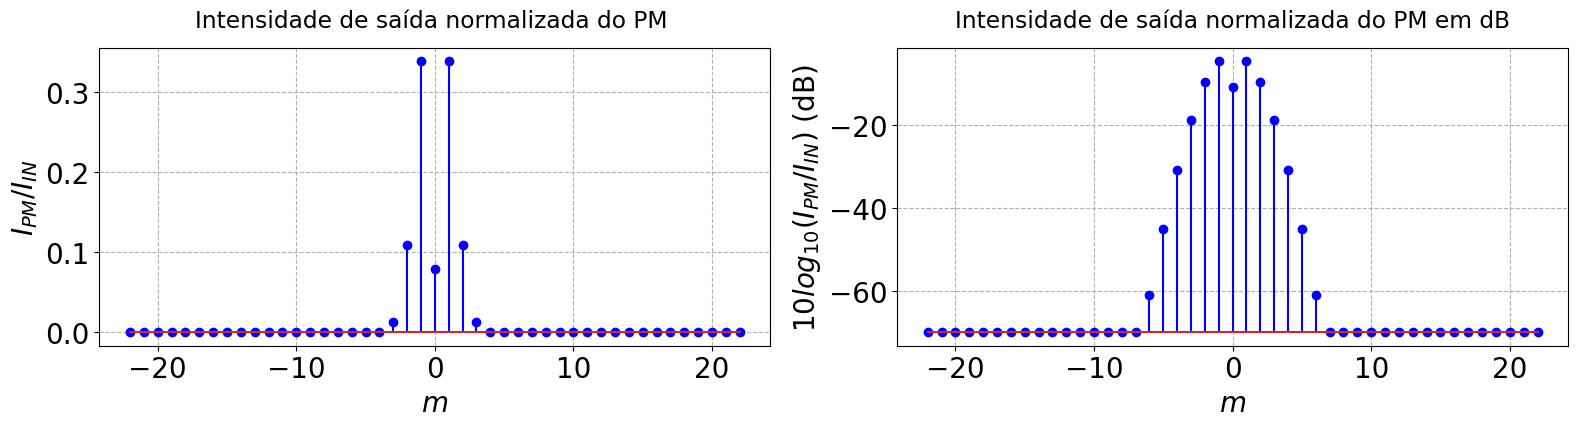

In [ ]:
#-------------- PLOTAR AS SLs GERADAS PELO PM -------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector pm
(ax_pm,comb_pm,comb_pm_dBm) = find_Iout_add_noise(up_n, Vector_pm, noise)
sistem1 = ' PM '
ploting_sl(ax_pm,comb_pm,comb_pm_dBm,sistem1)
print("Amz1a and Amz1b", Amz1a,"and", Amz1b)

<ipython-input-200-061f040af32b>:216: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-200-061f040af32b>:224: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


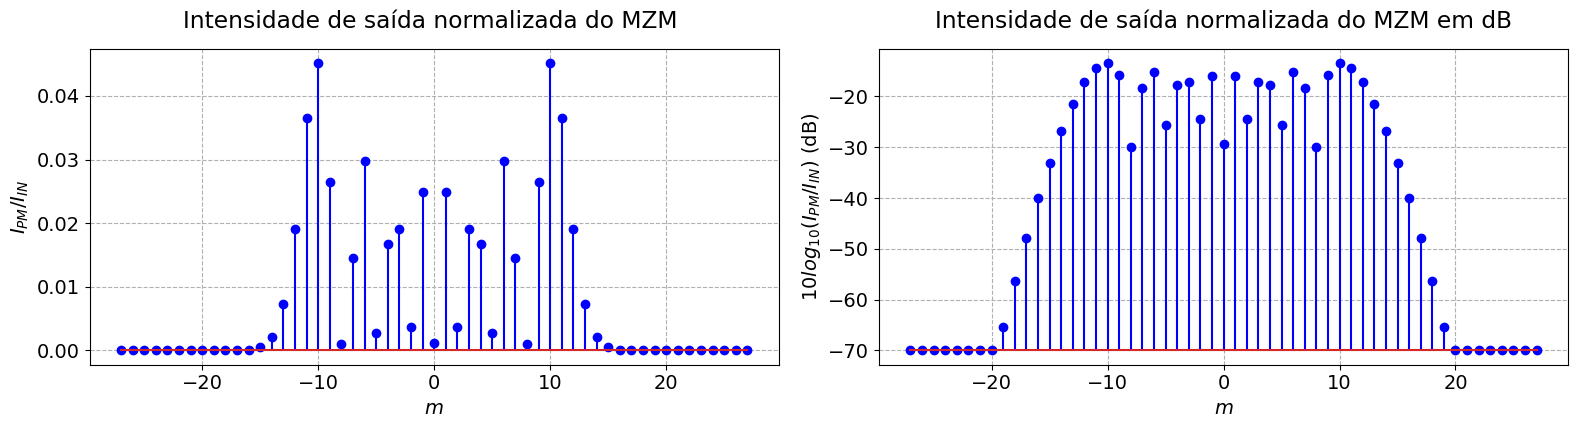

In [ ]:
#-------------- PLOTAR AS SLs GERADAS PELO MZM -------------------------
# usa-se a linha onde é gerada os valores do campo eletrico e o tamanho do vector mz
(ax_mz,comb_mz,comb_mz_dBm) = find_Iout_add_noise(up_m, Vector_mz, noise)
sistem2 = ' MZM '
ploting_sl(ax_mz,comb_mz,comb_mz_dBm,sistem2)


In [ ]:
# Pente do PM a ser analisado
vec_SL = comb_mz  # Vetor de intensidade em mW
eN     = 21          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)


Tamanho do vector de saida do EOM : 55
eNc = 21
men -29.927668746414
men -13.4541031529579
CV = 76.18624
AV = 16.47357


** INTEGRANDO PM MZ MZ MZ **

<ipython-input-200-061f040af32b>:216: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-200-061f040af32b>:224: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


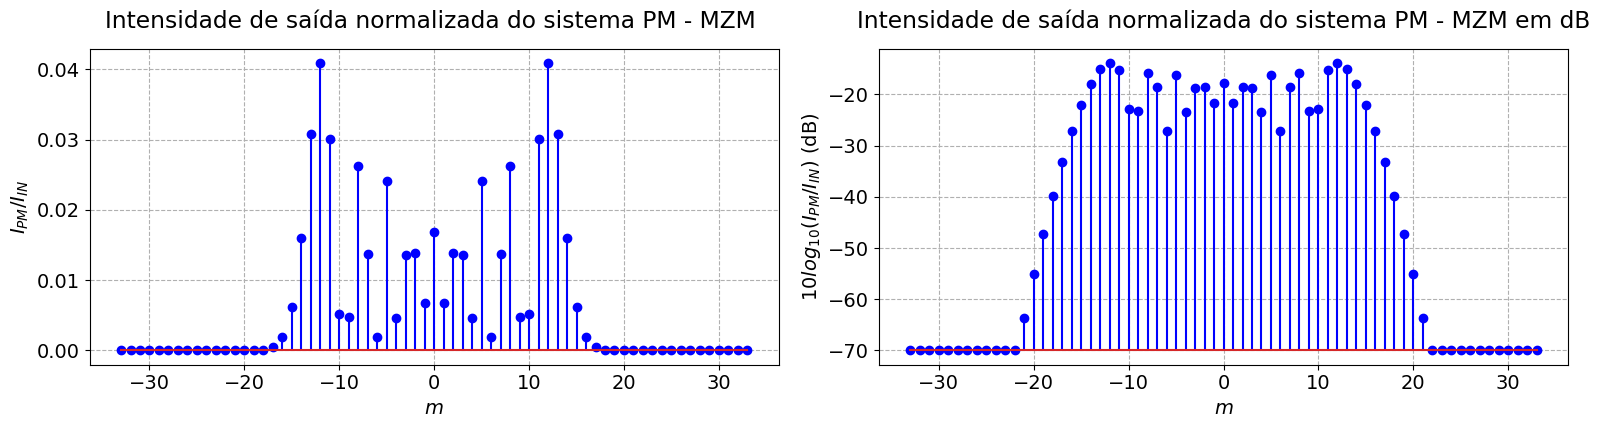

In [ ]:
###############  PM - MZM------------------------------

up_2     = up_n
Vector_2 = Vector_pm
up_1     = up_m
Vector_1 = Vector_mz
# Aplica-se a função de produto de campos para obter o vetor resultante do sistema PM-MZM
(up_3, Matrix_cross3, Vector_EFre3, Vector_Ire3) = crossprod_efield(up_1, Vector_1, up_2, Vector_2)

# Aplica-se a função add_noise para colocar um ruido de referência
(ax_vector3,comb3,comb_dBm3)=add_noise(up_3, Vector_Ire3, noise)

#print(comb3)
#print(type(comb3))
file = open("comb_3data.csv","a", newline="")
writer = csv.writer(file)
writer.writerow(comb_dBm3)
file.close()

# Aplica-se a função reduzir vector para ajustar ao dominio de outros pentes obtidos
up_act = up_3
up_new = 67
(ax_new3, new_vcomb3) = reduct_vector(up_act, comb3, up_new)
(ax_new3, new_vcomb_dB3) = reduct_vector(up_act, comb_dBm3, up_new)

sistem3 = ' sistema PM - MZM '
ploting_sl(ax_new3,new_vcomb3,new_vcomb_dB3,sistem3)


In [ ]:
# Pente do PM a ser analisado
vec_SL = new_vcomb3  # Vetor de intensidade em mW
eN     = 17          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)

Tamanho do vector de saida do EOM : 67
eNc = 17
men -27.1294335669779
men -15.7998340374485
CV = 59.78802
AV = 11.3296


<ipython-input-200-061f040af32b>:216: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-200-061f040af32b>:224: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


153
121


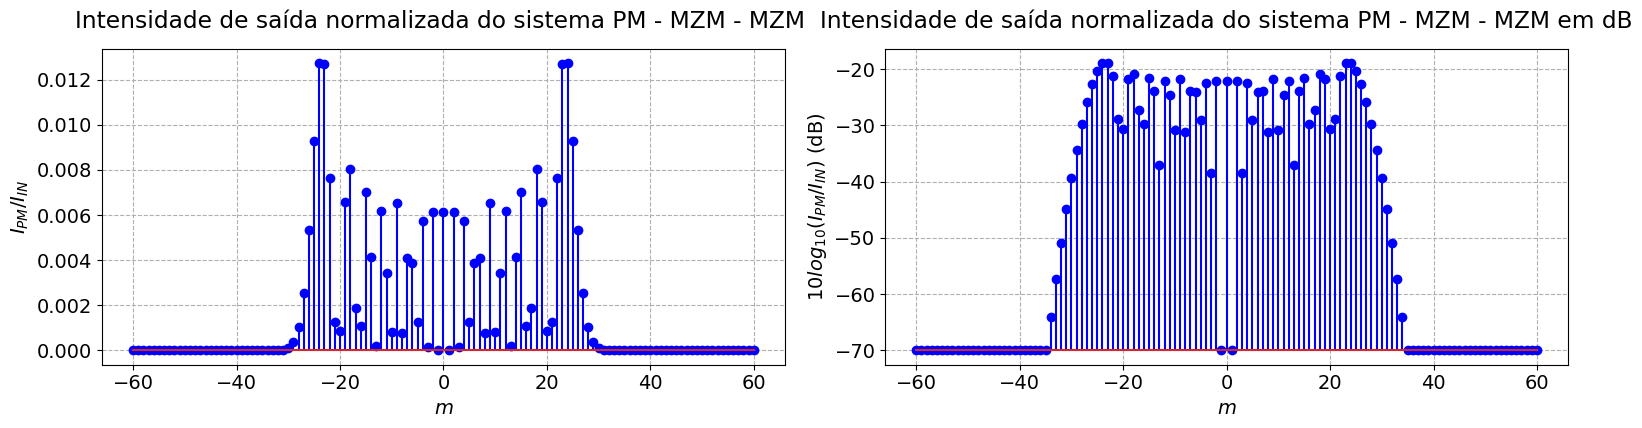

In [ ]:
# ESTAGIO 4
# Resultado para PM-MZM e um outro MZM
# vetor saida anterior
E_eoms_3  = Vector_EFre3
# Novo vetor colocado na cascata
E_mz2     = Vector_mz

(up_4, Matrix_cross4, Vector_EFre4, Vector_Ire4) = crossprod_efield(up_m, E_mz2, up_3, E_eoms_3)   #= crossprod_efield(up_m, Vector_mz, up_3, Vector_EFre3)

# Aplica-se a função add_noise para colocar um ruido de referência
(ax_vector4,comb4,comb_dBm4)=add_noise(up_4, Vector_Ire4, noise)

# Aplica-se a função reduzir vector para ajustar ao dominio de outros pentes obtidos, após colocar ruidos
up_act = up_4
up_new = 121
(ax_new4, new_vcomb4) = reduct_vector(up_act, comb4, up_new)
(ax_new4, new_vcomb_dB4) = reduct_vector(up_act, comb_dBm4, up_new)

sistem4 = ' sistema PM - MZM - MZM '
ploting_sl(ax_new4,new_vcomb4,new_vcomb_dB4,sistem4)

print(up_4)
print(len(ax_new4))


In [ ]:
# Pente do PM a ser analisado
vec_SL = new_vcomb4  # Vetor de intensidade em mW
eN     = 47          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)


Tamanho do vector de saida do EOM : 121
eNc = 47
men -inf
men -18.9575742306175
CV = 81.45092
AV = inf


<ipython-input-200-061f040af32b>:216: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[0].stem(axrange,comb,
<ipython-input-200-061f040af32b>:224: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes[1].stem(axrange,comb_dBm,


207
121


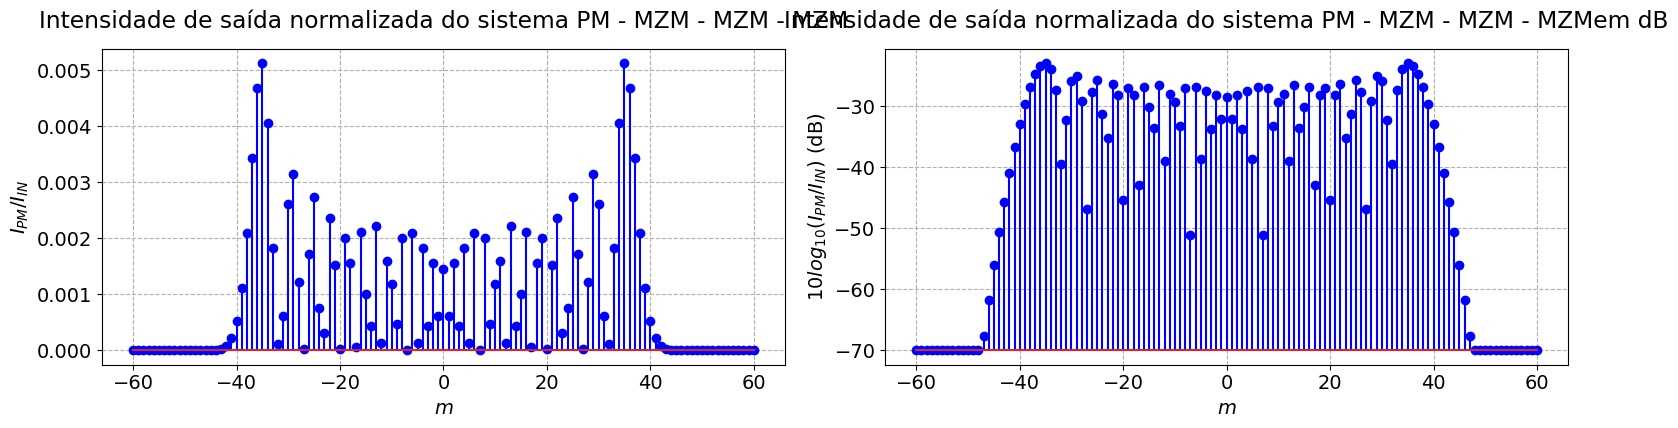

In [ ]:
# PM - MZM - MZM - MZM   up_5
# Resultado para PM-MZM-MZM e um outro MZM
(up_5, Matrix_cross5, Vector_EFre5, Vector_Ire5) = crossprod_efield(up_m, Vector_mz, up_4, Vector_EFre4)

# Aplica-se a função add_noise para colocar um ruido de referência
(ax_vector5,comb5,comb_dBm5)=add_noise(up_5, Vector_Ire5, noise)

# Aplica-se a função reduzir vector para ajustar ao dominio de outros pentes obtidos, após colocar ruidos
up_act = up_5
up_new1 = 121
(ax_new5, new_vcomb5) = reduct_vector(up_act, comb5, up_new1)
(ax_new5, new_vcomb_dB5) = reduct_vector(up_act, comb_dBm5, up_new1)

sistem5 = ' sistema PM - MZM - MZM - MZM'
ploting_sl(ax_new5,new_vcomb5,new_vcomb_dB5,sistem5)

print(up_5)
print(len(ax_new5))

In [ ]:
# Pente do PM a ser analisado
vec_SL = new_vcomb5  # Vetor de intensidade em mW
eN     = 71          # Numero de SLs a ser analisadas
analise_SD_AV(vec_SL, eN)



Tamanho do vector de saida do EOM : 121
eNc = 71
men -51.1121369456194
men -22.9035325040178
CV = 83.16275
AV = 28.2086


<ipython-input-215-2196a5b54cb4>:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(ax_new1n, new_vcomb_dB5,


121


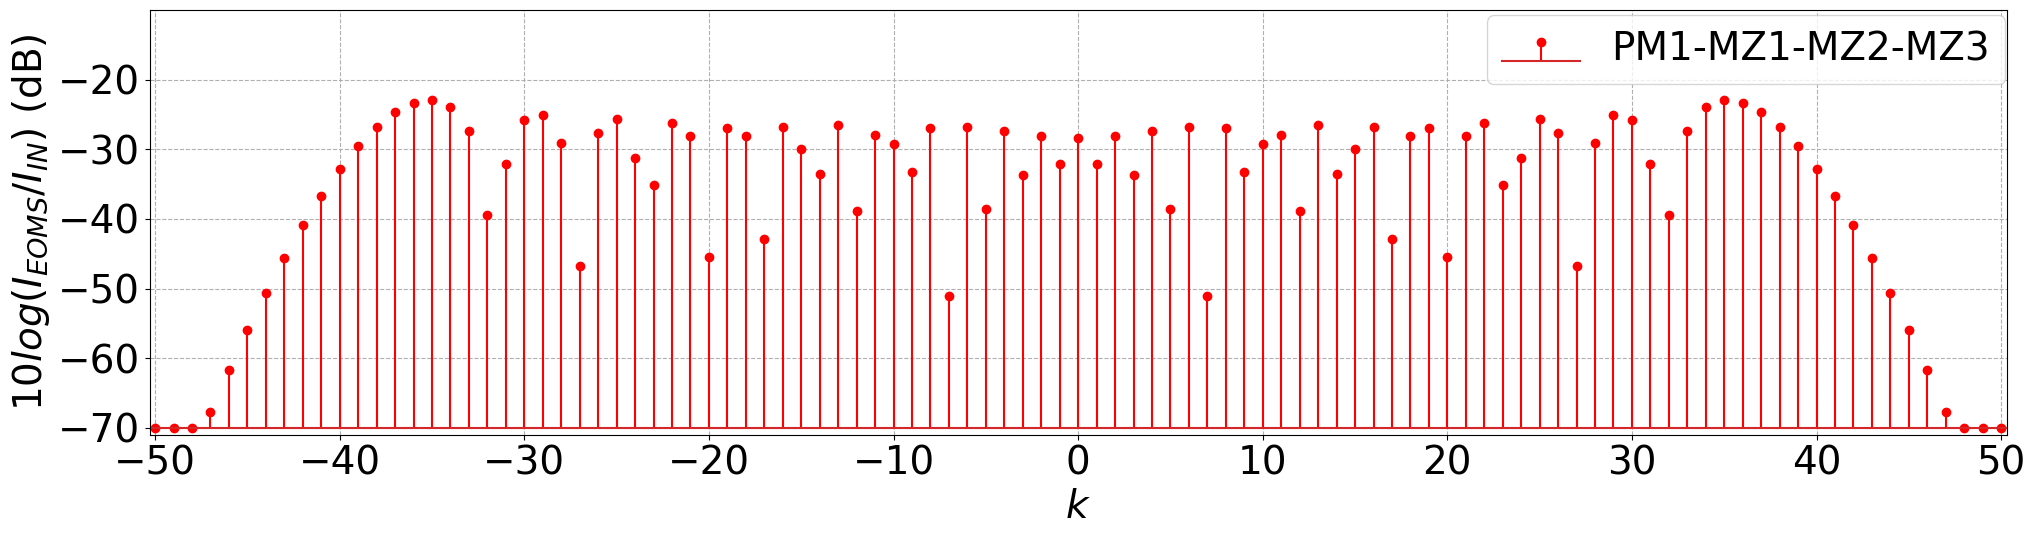

In [ ]:
# Ajuste do dominio do PM :
up_new  = 121
(ax_new1n, new_vcomb1n) = increase_vector(up_n, comb_pm_dBm, up_new, 2, noise)

# Ajuste do dominio do MZ a up_new :
(ax_new2n, new_vcomb2n) = increase_vector(up_m, comb_mz_dBm, up_new, 2, noise)

# Ajuste do dominio do PM - MZ a up_new: o vetor original tem tam maior do 111
(ax_new3n, new_vcomb3n) = increase_vector(67, new_vcomb_dB3, up_new, 2, noise)

# Ajuste do dominio do PM - MZ - MZM a up_new (atual de PM-MZM-MZM-MZM): o vetor original tem tam maior do 111
# increase_vector(up_act, vec_comb, up_new, unid, noise):
(ax_new4n, new_vcomb4n) = increase_vector(111, new_vcomb_dB4, up_new, 2, noise)


fig, ax = plt.subplots(1, 1, figsize=(21, 6), tight_layout=True)
plt.rcParams['font.size'] = '28'

ax.stem(ax_new1n, new_vcomb_dB5,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='red', markerfmt='ro', label="PM1-MZ1-MZ2-MZ3")
'''
ax.stem(ax_new1n, new_vcomb_dB4,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='blue', markerfmt='bo', label="PM1-MZ1-MZ2")

ax.stem(ax_new1n, new_vcomb3n,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='purple', markerfmt='purple', label="PM1-MZ1")
'''

#specify axis tick step sizes
plt.xticks(np.arange(min(ax_new1n), max(ax_new1n)+1, 10))
plt.yticks(np.arange(-70, -10, 10))   # faixa do grid e tamanho do paso
ax.set(xlim=(-50.3, 50.3), ylim=(-71, -10))  # ploting area xlabel and y label




# ax.legend(loc=(0.82, 0.825)) #PM1-MZ1
ax.legend(loc=(0.72, 0.825)) # PM1-MZ 1 A 3
ax.grid(True,which="both", linestyle='--')
ax.set_xlabel('$k$')
ax.set_ylabel("$10 log(I_{EOMS}/I_{IN})$ (dB)")

print(len(ax_new1n))

# https://appgametutoriales.com/tipos-de-marcadores-matplotlib-python/


<ipython-input-211-406c8e813787>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(ax_new1n, new_vcomb_dB5,
<ipython-input-211-406c8e813787>:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(ax_new1n, new_vcomb_dB4,
<ipython-input-211-406c8e813787>:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(ax_new1n, new_vcomb3n,


121


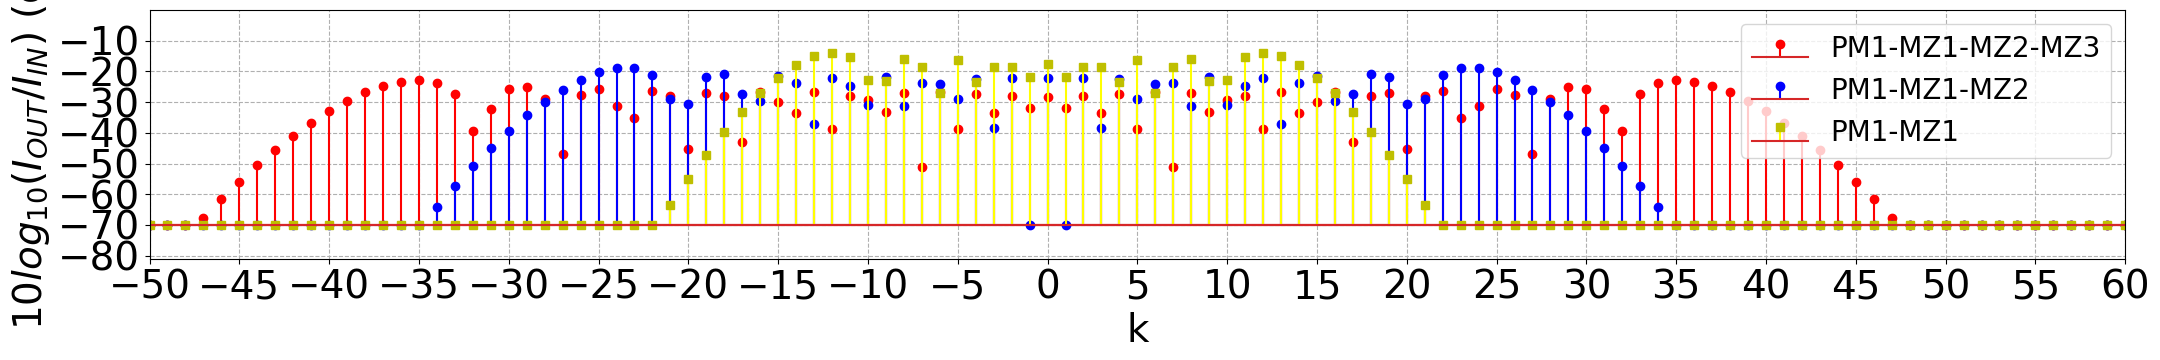

In [ ]:
# Ajuste do dominio do PM :
up_new  = 121
(ax_new1n, new_vcomb1n) = increase_vector(up_n, comb_pm_dBm, up_new, 2, noise)

# Ajuste do dominio do MZ a up_new :
(ax_new2n, new_vcomb2n) = increase_vector(up_m, comb_mz_dBm, up_new, 2, noise)

# Ajuste do dominio do PM - MZ a up_new: o vetor original tem tam maior do 111
(ax_new3n, new_vcomb3n) = increase_vector(67, new_vcomb_dB3, up_new, 2, noise)

# Ajuste do dominio do PM - MZ - MZM a up_new (atual de PM-MZM-MZM-MZM): o vetor original tem tam maior do 111
# increase_vector(up_act, vec_comb, up_new, unid, noise):
(ax_new4n, new_vcomb4n) = increase_vector(111, new_vcomb_dB4, up_new, 2, noise)


fig, ax = plt.subplots(1, 1, figsize=(22, 4), tight_layout=True)
plt.rcParams['font.size'] = '20'
ax.stem(ax_new1n, new_vcomb_dB5,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='red', markerfmt='ro', label="PM1-MZ1-MZ2-MZ3")
ax.stem(ax_new1n, new_vcomb_dB4,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='blue', markerfmt='bo', label="PM1-MZ1-MZ2")
ax.stem(ax_new1n, new_vcomb3n,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='yellow', markerfmt='ys', label="PM1-MZ1")

'''
ax.stem(ax_new1n, new_vcomb2n,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='aqua', markerfmt='o', label="MZ")
ax.stem(ax_new1n, new_vcomb1n,
              bottom = noise_dBm,
              use_line_collection = True, linefmt='green', markerfmt='go', label="PM")
'''
#ax.legend((40, -40), ('oscillatory', 'damped'), loc='upper right', shadow=True)
#specify axis tick step sizes
plt.xticks(np.arange(min(ax_new1n), max(ax_new1n)+1, 5))
plt.yticks(np.arange(-80, 0, 10))     # faixa do grid e tamanho do paso

ax.set(xlim=(-50, 60), ylim=(-81, 0))  # ploting area

#ax.set(xlim=(-55, 55), ylim=(-81, 0))  # ploting area
ax.legend()
ax.grid(True,which="both", linestyle='--')
ax.set_xlabel('k')
ax.set_ylabel("$10 log_{10}(I_{OUT}/I_{IN})$ (dB)")

print(len(ax_new1n))